In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.



# from myutils import *
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
# td =train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
# test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
td =train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

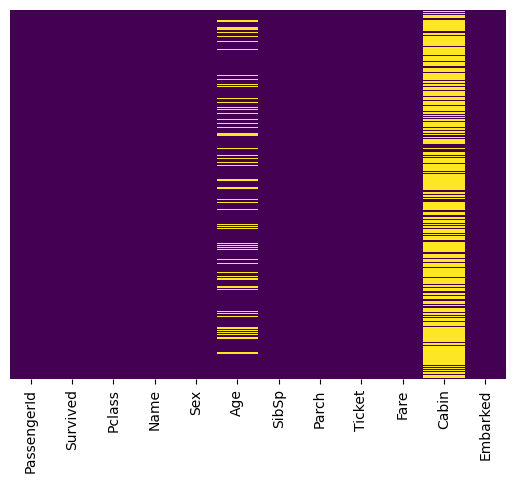

In [11]:
# td.isnull()
sns.heatmap(td.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

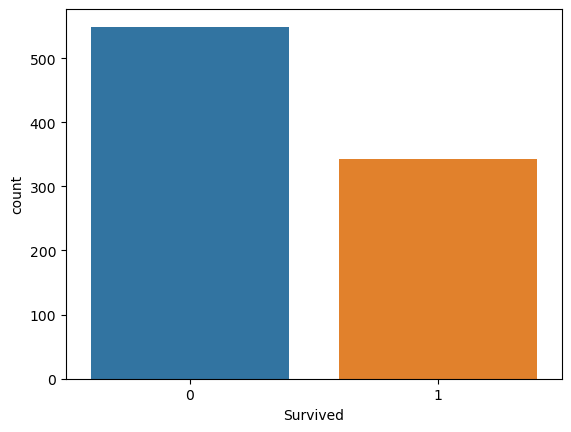

In [12]:
sns.countplot(x='Survived', data=td)

<Axes: xlabel='Survived', ylabel='count'>

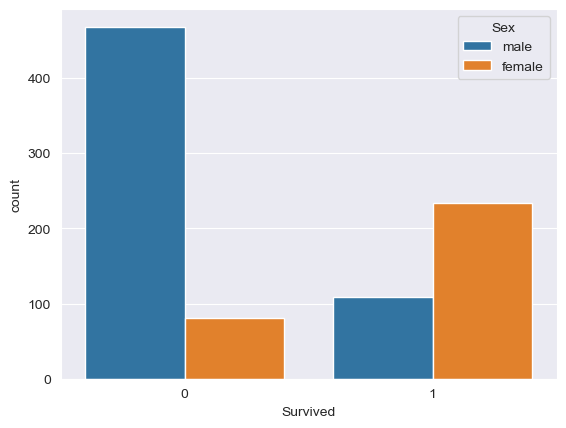

In [13]:
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue='Sex', data=td)

<Axes: xlabel='Survived', ylabel='count'>

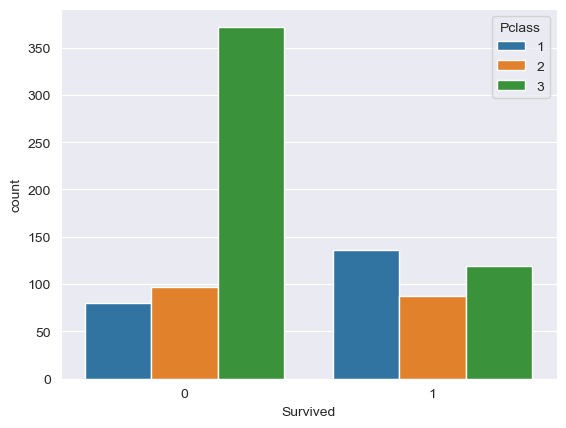

In [14]:
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue='Pclass', data=td)

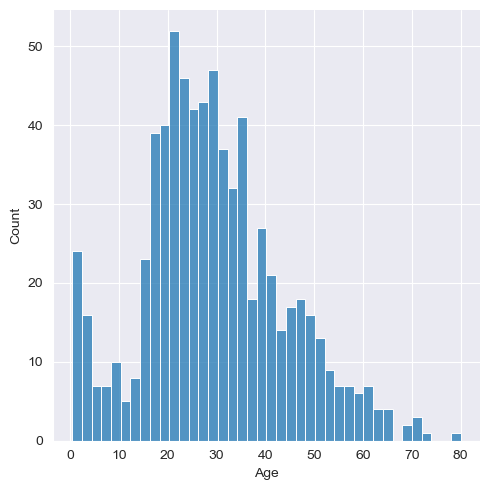

In [15]:
sns.displot(td.Age.dropna(), kde=False, bins=40)
# td.Age.hist(bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

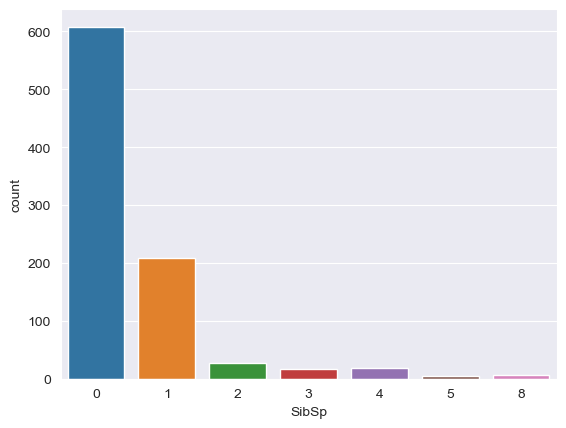

In [16]:
sns.countplot(x='SibSp', data=td, )

<Axes: xlabel='SibSp', ylabel='count'>

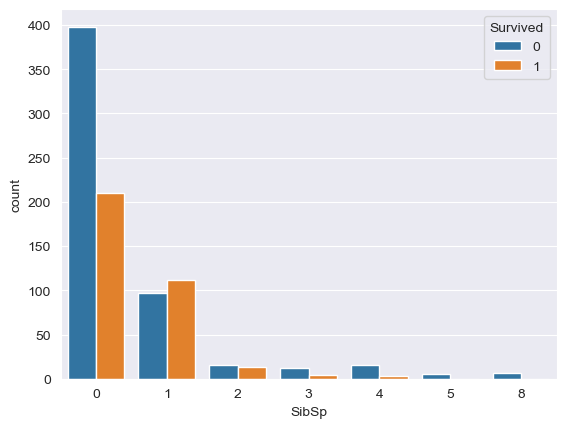

In [17]:
sns.countplot(x='SibSp', hue='Survived', data=td, )

<Axes: >

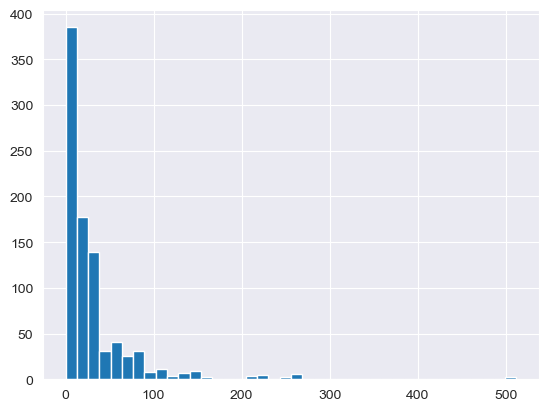

In [18]:
td.Fare.hist(bins=40)

# Data Cleaning

<Axes: xlabel='Pclass', ylabel='Age'>

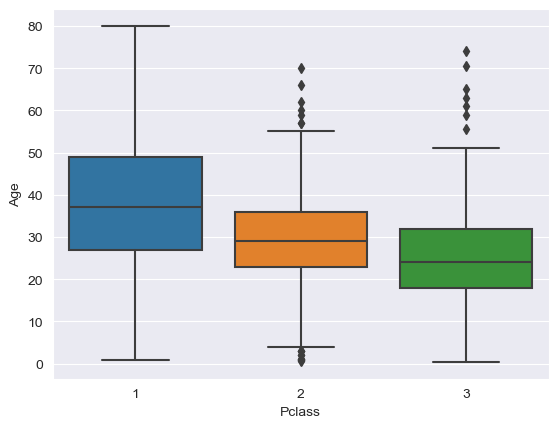

In [19]:
sns.boxplot(x='Pclass', y='Age', data=td)
# sns.boxplot(x='SibSp', y='Age', data=td)
# sns.boxplot(x='Parch', y='Age', data=td)

In [20]:
td.shape, train_data.shape, test_data.shape

((891, 12), (891, 12), (418, 11))

In [21]:
# data = td
# data['Initial']=0
# for i in data:
#     data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [22]:
# pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

In [23]:
# data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [24]:
# data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

In [25]:
# ## Assigning the NaN Values with the Ceil values of the mean ages
# data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
# data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
# data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
# data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
# data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [26]:
# data.Age.isnull().any() #So no null values left finally 

In [27]:
def clean_age(cols):
    # print(cols.columns)
    age, dep = cols.columns
    res = cols[age]
    classes = pd.unique(cols[dep])
    tot = 0
    for c in classes:
        # print(len(res[res.isnull()==True][cols[dep]==c]))
        res[(res.isnull()==True) & (cols[dep]==c)] = np.median(cols[cols[dep]==c][age].dropna())
        # print(len(res[res.isnull()==True][cols[dep]==c]))
    return res

print(len(td[td.Age.isnull()]))
td.Age = clean_age(td[['Age', 'Pclass']])
print(len(td[td.Age.isnull()]))

177
0


/var/folders/kf/1lvrcs_d0n5cycrr6f1txdvc0000gn/T/ipykernel_6935/3911383492.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[(res.isnull()==True) & (cols[dep]==c)] = np.median(cols[cols[dep]==c][age].dropna())


In [28]:
test_data.Age = clean_age(td[['Age', 'Pclass']])

/var/folders/kf/1lvrcs_d0n5cycrr6f1txdvc0000gn/T/ipykernel_6935/3911383492.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[(res.isnull()==True) & (cols[dep]==c)] = np.median(cols[cols[dep]==c][age].dropna())


<Axes: >

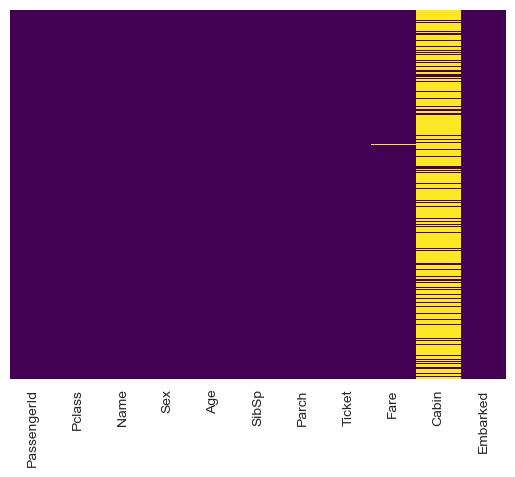

In [29]:
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [30]:
# One-Hot encodding for Embarked column

sex = pd.get_dummies(td.Sex, drop_first=True)
embark = pd.get_dummies(td.Embarked, drop_first=True)

In [31]:
td.drop(['Sex', 'Embarked'], inplace=True, axis=1)

In [32]:
td.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN


In [33]:
td = pd.concat([td, sex, embark], axis=1)
td.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


In [34]:
sex = pd.get_dummies(test_data.Sex, drop_first=True)
embark = pd.get_dummies(test_data.Embarked, drop_first=True)
test_data.drop(['Sex', 'Embarked'], inplace=True, axis=1)
test_data = pd.concat([test_data, sex, embark], axis=1)
test_data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S
0,892,3,"Kelly, Mr. James",22.0,0,0,330911,7.8292,NaN,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",38.0,1,0,363272,7.0000,NaN,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",26.0,0,0,240276,9.6875,NaN,1,1,0
3,895,3,"Wirz, Mr. Albert",35.0,0,0,315154,8.6625,NaN,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",35.0,1,1,3101298,12.2875,NaN,0,0,1


In [35]:
# def accuracy(y, y_):
#     return len(y[y==y_])/len(y)*100

In [36]:
from sklearn.ensemble import RandomForestClassifier

y = td["Survived"]

features = ["Pclass", "male", "SibSp", "Parch", "Fare", "Age", "Q", "S"]
X = pd.get_dummies(td[features])
X_test = pd.get_dummies(test_data[features])


In [37]:

def spilt_train_cv_test(X, Y, ratio):
    """
    returns : train_x, train_y, cv_x, cv_y, test_x, test_y
    """
    from sklearn.model_selection import train_test_split
    import numpy as np
    train, cv, test = ratio
    if cv==0.0:
        train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=test)#, random_state=42)
        cv_x, cv_y = [0], [0]
        return train_x, train_y, cv_x, cv_y, test_x, test_y
    train_x, tx, train_y, ty = train_test_split(X, Y, test_size=cv+test)#, random_state=42)
    # print(tx.shape, ty.shape)
    cv_x, test_x, cv_y, test_y = train_test_split(tx, ty, test_size=test/(cv+test))#, random_state=42)

    return train_x, train_y, cv_x, cv_y, test_x, test_y


def accuracy(y, y_):
    return len(y[y==y_])/len(y)*100

In [38]:
from xgboost import XGBClassifier as xgc
# from myutils import *

print(X.shape,y.shape)
train_x, train_y, cv_x, cv_y, test_x, test_y = spilt_train_cv_test(X, y, [0.7, 0.0, 0.3])
print(train_x.shape, test_x.shape, )

model = xgc()
model.fit(train_x, train_y)
# model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
# model.fit(X, y)

y_ = model.predict(train_x)
print(accuracy(train_y, y_))
y_ = model.predict(test_x)
print(accuracy(test_y, y_))
# print(accuracy(cv_y, model.predict(cv_x)))
# print(accuracy(test_y, model.predict(test_x)))

(891, 8) (891,)
(623, 8) (268, 8)
97.91332263242376
83.2089552238806


In [39]:
from sklearn.metrics import confusion_matrix as cm

# cm(y, y_)

In [40]:
model.fit(X, y)
y_ = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_})
output.to_csv('submission.csv', index=False)
print("Submission successfully saved!")
# accuracy(y, y_)

Submission successfully saved!


In [42]:
# X_test.spape